In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

### Load training and testing data

In [2]:
# Load Training Data
train_data = pd.read_csv("input/training_set_VU_DM.csv")
train_data.head()

# Load Test Data
test_data = pd.read_csv("input/test_set_VU_DM.csv")
test_data.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff
0,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,3180,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,5543,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,14142,2,3.5,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,22393,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,2013-02-02 15:27:40,24,216,NaN,NaN,219,24194,3,4.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### directly use the result

In [9]:
output = pd.read_csv('result.csv')
# print(output)

result = pd.DataFrame({'srch_id': test_data.srch_id, 'prop_id': test_data.prop_id, 'value': output.value})
output = result.sort_values(by=['srch_id', 'value'], ascending = (True, False))[['srch_id', 'prop_id']]
print(output)

output.to_csv('output/my_submission.csv', index=False)
print('Your submission was successfully saved!')

         srch_id  prop_id
23             1    99484
9              1    54937
12             1    61934
8              1    50162
5              1    28181
...          ...      ...
4959179   332787    33959
4959178   332787    32019
4959182   332787    99509
4959181   332787    94437
4959180   332787    35240

[4959183 rows x 2 columns]
Your submission was successfully saved!


### Display attributes

In [12]:
train_data.info(null_counts=True)
test_data.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 54 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   srch_id                      4958347 non-null  int64  
 1   date_time                    4958347 non-null  object 
 2   site_id                      4958347 non-null  int64  
 3   visitor_location_country_id  4958347 non-null  int64  
 4   visitor_hist_starrating      251866 non-null   float64
 5   visitor_hist_adr_usd         252988 non-null   float64
 6   prop_country_id              4958347 non-null  int64  
 7   prop_id                      4958347 non-null  int64  
 8   prop_starrating              4958347 non-null  int64  
 9   prop_review_score            4950983 non-null  float64
 10  prop_brand_bool              4958347 non-null  int64  
 11  prop_location_score1         4958347 non-null  float64
 12  prop_location_score2         3867999 non-n

### Get overview of missing data per feature

In [14]:
table = []
for i in train_data.columns:
    total_null = train_data[i].isnull().sum()
    table.append([i, total_null, 100*total_null/len(train_data[i])])

In [15]:
missing_values_overview = pd.DataFrame(table, columns = ["Feature Name", "Total Null", "% Null"])
missing_values_overview.sort_values("% Null",ascending = False) # arrange features based on % Null 

,Feature Name,Total Null,% Null
29,comp1_rate_percent_diff,4863908,98.095353
44,comp6_rate_percent_diff,4862173,98.060362
27,comp1_rate,4838417,97.581250
28,comp1_inv,4828788,97.387053
38,comp4_rate_percent_diff,4827261,97.356256
52,gross_bookings_usd,4819957,97.208949
47,comp7_rate_percent_diff,4819832,97.206428
42,comp6_rate,4718190,95.156511
4,visitor_hist_starrating,4706481,94.920364
5,visitor_hist_adr_usd,4705359,94.897735


### Filling in the missing values for "prop_review_score"

In [16]:
train_data.loc[:,"prop_review_score"][train_data.loc[:,"prop_review_score"].isnull()] = train_data.loc[:,"prop_review_score"].median()

test_data.loc[:,"prop_review_score"][test_data.loc[:,"prop_review_score"].isnull()] = test_data.loc[:,"prop_review_score"].median()

<ipython-input-16-b35225f27fac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.loc[:,"prop_review_score"][train_data.loc[:,"prop_review_score"].isnull()] = train_data.loc[:,"prop_review_score"].median()
<ipython-input-16-b35225f27fac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:,"prop_review_score"][test_data.loc[:,"prop_review_score"].isnull()] = test_data.loc[:,"prop_review_score"].median()


### Filling in the missing values for "prop_location_score2"

In [17]:
temp_df = train_data.loc[:,["prop_id","prop_location_score2"]][train_data.loc[:,"prop_location_score2"].notnull()].groupby(["prop_id"]).max()
dict_ids = temp_df.to_dict()['prop_location_score2'] # this is a list of property id's and the mode prop_location_score2
train_data["prop_location_score2"][train_data["prop_location_score2"].isnull()] = train_data["prop_id"].map(dict_ids)
train_data["prop_location_score2"][train_data["prop_location_score2"].isnull()] = train_data["prop_location_score2"].median()

temp_df = test_data.loc[:,["prop_id","prop_location_score2"]][test_data.loc[:,"prop_location_score2"].notnull()].groupby(["prop_id"]).max()
dict_ids = temp_df.to_dict()['prop_location_score2'] # this is a list of property id's and the mode prop_location_score2
test_data["prop_location_score2"][test_data["prop_location_score2"].isnull()] = test_data["prop_id"].map(dict_ids)
test_data["prop_location_score2"][test_data["prop_location_score2"].isnull()] = test_data["prop_location_score2"].median()

<ipython-input-17-c4a9444f7ab9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["prop_location_score2"][train_data["prop_location_score2"].isnull()] = train_data["prop_id"].map(dict_ids)
<ipython-input-17-c4a9444f7ab9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["prop_location_score2"][train_data["prop_location_score2"].isnull()] = train_data["prop_location_score2"].median()
<ipython-input-17-c4a9444f7ab9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

### Filling in the missing values for "orig_destination_distance"

In [18]:
temp_df = train_data[["visitor_location_country_id","prop_country_id","orig_destination_distance"]][train_data["orig_destination_distance"].notnull()]
temp_df['new_col'] = list(zip(temp_df["visitor_location_country_id"], temp_df["prop_country_id"]))
org_dest_dict = temp_df.groupby(["new_col"]).median()["orig_destination_distance"].to_dict()

temp_nan = train_data[["visitor_location_country_id","prop_country_id","orig_destination_distance"]][train_data["orig_destination_distance"].isnull()]
temp_nan['new_col'] = list(zip(temp_nan["visitor_location_country_id"], temp_nan["prop_country_id"]))
if not temp_nan["new_col"].map(org_dest_dict).empty:
    train_data["orig_destination_distance"] = temp_nan["new_col"].map(org_dest_dict)
    train_data["orig_destination_distance"][train_data["orig_destination_distance"].isnull()] = train_data["orig_destination_distance"].median()

    

temp_df = test_data[["visitor_location_country_id","prop_country_id","orig_destination_distance"]][test_data["orig_destination_distance"].notnull()]
temp_df['new_col'] = list(zip(temp_df["visitor_location_country_id"], temp_df["prop_country_id"]))
org_dest_dict = temp_df.groupby(["new_col"]).median()["orig_destination_distance"].to_dict()

temp_nan = test_data[["visitor_location_country_id","prop_country_id","orig_destination_distance"]][test_data["orig_destination_distance"].isnull()]
temp_nan['new_col'] = list(zip(temp_nan["visitor_location_country_id"], temp_nan["prop_country_id"]))
if not temp_nan["new_col"].map(org_dest_dict).empty:
    test_data["orig_destination_distance"] = temp_nan["new_col"].map(org_dest_dict)
    test_data["orig_destination_distance"][test_data["orig_destination_distance"].isnull()] = test_data["orig_destination_distance"].median()    

<ipython-input-18-c130cc7e6145>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["orig_destination_distance"][train_data["orig_destination_distance"].isnull()] = train_data["orig_destination_distance"].median()
<ipython-input-18-c130cc7e6145>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["orig_destination_distance"][test_data["orig_destination_distance"].isnull()] = test_data["orig_destination_distance"].median()


### Filling in the missing values for "srch_query_affinity_score"

In [19]:
dict_scores = train_data[["prop_id","srch_query_affinity_score"]][train_data["srch_query_affinity_score"].notnull()].groupby(["prop_id"]).median().to_dict()["srch_query_affinity_score"]

# search for past scores based on prop_id
train_data["srch_query_affinity_score"][train_data["srch_query_affinity_score"].isnull()] = train_data["prop_id"].map(dict_scores)

# for all remaining values, use the minimum affinity score
train_data["srch_query_affinity_score"][train_data["srch_query_affinity_score"].isnull()] = train_data["srch_query_affinity_score"][train_data["srch_query_affinity_score"].notnull()].min()


dict_scores = test_data[["prop_id","srch_query_affinity_score"]][test_data["srch_query_affinity_score"].notnull()].groupby(["prop_id"]).median().to_dict()["srch_query_affinity_score"]

# search for past scores based on prop_id
test_data["srch_query_affinity_score"][test_data["srch_query_affinity_score"].isnull()] = test_data["prop_id"].map(dict_scores)

# for all remaining values, use the minimum affinity score
test_data["srch_query_affinity_score"][test_data["srch_query_affinity_score"].isnull()] = test_data["srch_query_affinity_score"][test_data["srch_query_affinity_score"].notnull()].min()

<ipython-input-19-f33630af3840>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["srch_query_affinity_score"][train_data["srch_query_affinity_score"].isnull()] = train_data["prop_id"].map(dict_scores)
<ipython-input-19-f33630af3840>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["srch_query_affinity_score"][train_data["srch_query_affinity_score"].isnull()] = train_data["srch_query_affinity_score"][train_data["srch_query_affinity_score"].notnull()].min()
<ipython-input-19-f33630af3840>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats 

## New Attributes

### Strong Competitor

In [20]:
def competitor(vec):
    ret = 0
    for i in range(0, 8):
        inv = vec[i * 3]
        rate = vec[i * 3 + 1]
        rpd = vec[i * 3 + 2]
        if np.isnan(inv) or np.isnan(rate) or np.isnan(rpd):
            continue
        elif inv < 0.5 and rate < 0 and rpd > 10:
            return 1
        else:
            ret = -1
    return ret        

feature = []
for i in range(1, 9):
    inv = f"comp{i}_inv"
    rate = f"comp{i}_rate"
    rpd = f"comp{i}_rate_percent_diff"
    feature.extend([inv, rate, rpd])
print(feature)
train_data["strong_competitor"] = train_data[feature].apply(competitor, axis=1)
test_data["strong_competitor"] = test_data[feature].apply(competitor, axis=1)


['comp1_inv', 'comp1_rate', 'comp1_rate_percent_diff', 'comp2_inv', 'comp2_rate', 'comp2_rate_percent_diff', 'comp3_inv', 'comp3_rate', 'comp3_rate_percent_diff', 'comp4_inv', 'comp4_rate', 'comp4_rate_percent_diff', 'comp5_inv', 'comp5_rate', 'comp5_rate_percent_diff', 'comp6_inv', 'comp6_rate', 'comp6_rate_percent_diff', 'comp7_inv', 'comp7_rate', 'comp7_rate_percent_diff', 'comp8_inv', 'comp8_rate', 'comp8_rate_percent_diff']


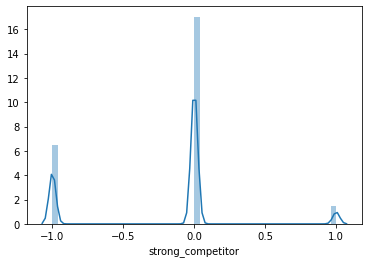

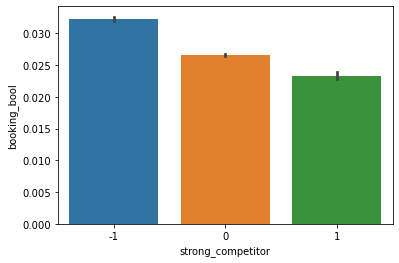

In [21]:
plt.figure()
sns.distplot(train_data['strong_competitor'])

plt.figure()
sns.barplot(x = 'strong_competitor', y = 'booking_bool', data=train_data)

### preferred

In [22]:
# 50% difference in price and +- 1.5 in rating
def preferred(vec):
    vh_star = vec[0]
    vh_used = vec[1]
    star = vec[2]
    price = vec[3]
    if np.isnan(vh_star) and np.isnan(vh_used):
        return 0
    if vh_star + 1.5 > star and vh_star - 1.5 < star:
        return 1
    if vh_used * 1.5 > price and vh_used / 1.5 < price:
        return 1
    return 0

train_data["preferred"] = train_data[["visitor_hist_starrating", "visitor_hist_adr_usd", "prop_starrating", "price_usd"]].apply(preferred, axis=1)
test_data["preferred"] = test_data[["visitor_hist_starrating", "visitor_hist_adr_usd", "prop_starrating", "price_usd"]].apply(preferred, axis=1) 

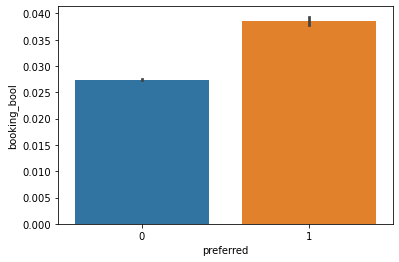

In [23]:
train_data["preferred"].value_counts()

plt.figure()
sns.barplot(x = 'preferred', y = 'booking_bool', data=train_data)

### foreigner

In [24]:
def foreigner(vec):
    v_cid = vec[0]
    cid = vec[1]
    if v_cid == cid:
        return 1
    return 0

train_data["foreigner"] = train_data[["visitor_location_country_id", "prop_country_id"]].apply(foreigner, axis=1)
test_data["foreigner"] = test_data[["visitor_location_country_id", "prop_country_id"]].apply(foreigner, axis=1) 

In [25]:
train_data["foreigner"].value_counts()

1    3164018
0    1794329
Name: foreigner, dtype: int64

### price group

In [26]:
def price_group(price):
    if price < 125:
        return 1
    elif price < 200:
        return 2
    elif price < 400:
        return 3
    else:
        return 4
    
train_data["price_group"] = train_data["price_usd"].apply(price_group)
test_data["price_group"] = test_data["price_usd"].apply(price_group)

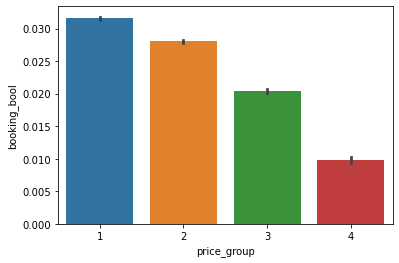

In [27]:
train_data['price_group'].value_counts()

plt.figure()
sns.barplot(x = 'price_group', y = 'booking_bool', data=train_data)

### distance group and country id(maybe later)

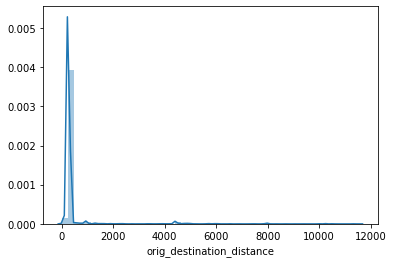

In [37]:
#plt.figure()
#sns.distplot(train_data['orig_destination_distance'])

In [38]:
train_data["prop_country_id"].value_counts()

219    3030125
100     311283
55      186465
31      154287
99      135388
        ...   
180         12
7           10
126          7
204          5
165          2
Name: prop_country_id, Length: 172, dtype: int64

### prop_location_score

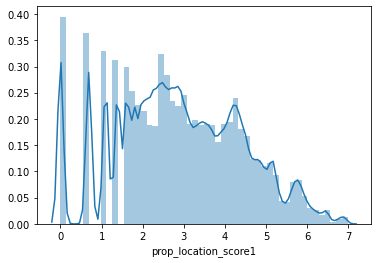

In [42]:
plt.figure()
sns.distplot(train_data['prop_location_score1'])

In [28]:
def location_score1(location1):
    return round(location1 * 2) / 2

train_data["location_score1"] = train_data["prop_location_score1"].apply(location_score1)
test_data["location_score1"] = test_data["prop_location_score1"].apply(location_score1)

In [45]:
train_data["location_score1"].value_counts()

2.5    638336
2.0    610548
3.0    565160
4.0    476921
3.5    474827
1.5    424301
4.5    412301
5.0    291893
0.0    273229
0.5    251968
1.0    227912
5.5    134118
6.0    123928
6.5     37631
7.0     15274
Name: location_score1, dtype: int64

In [29]:
def location_score2(location2):
    return round(location2, 1)

train_data["location_score2"] = train_data["prop_location_score2"].apply(location_score2)
test_data["location_score2"] = test_data["prop_location_score2"].apply(location_score2)

In [49]:
train_data["location_score2"].value_counts()

0.0    1845219
0.1    1441825
0.2     640809
0.3     376332
0.4     243400
0.5     162755
0.6     105264
0.7      69703
0.8      42018
0.9      21597
1.0       9425
Name: location_score2, dtype: int64

In [30]:
def log_historical_price(hist):
    return round(hist * 2) / 2

train_data["log_historical_price"] = train_data["prop_log_historical_price"].apply(log_historical_price)
test_data["log_historical_price"] = test_data["prop_log_historical_price"].apply(log_historical_price)

train_data["log_historical_price"].value_counts()

5.0    1620849
4.5     979875
5.5     955346
0.0     713899
6.0     440132
4.0     231042
3.5      14472
3.0       2391
2.5        197
1.5        132
2.0         12
Name: log_historical_price, dtype: int64

In [31]:
def length_of_stay(day):
    if day > 10:
        return 8
    if day > 7:
        return 7
    return day

train_data["length_of_stay"] = train_data["srch_length_of_stay"].apply(length_of_stay)
test_data["length_of_stay"] = test_data["srch_length_of_stay"].apply(length_of_stay)

train_data["length_of_stay"].value_counts()

1    2143980
2    1203153
3     717298
4     373594
7     186748
5     185744
6     102671
8      45159
Name: length_of_stay, dtype: int64

In [37]:
import math

def booking_window(day):
    return min(round(math.log(day + 1, 2)), 8)

train_data["booking_window"] = train_data["srch_booking_window"].apply(booking_window)
test_data["booking_window"] = test_data["srch_booking_window"].apply(booking_window)

train_data["booking_window"].value_counts()

5    864198
4    753816
3    722671
6    709261
2    633400
7    470386
1    374949
0    276815
8    152851
Name: booking_window, dtype: int64

In [85]:
train_data["srch_adults_count"].value_counts()

2    3246234
1    1156861
4     242176
3     239029
6      31043
5      27056
8      10300
7       4435
9       1213
Name: srch_adults_count, dtype: int64

In [86]:
train_data["srch_children_count"].value_counts()

0    3811774
1     675701
2     386976
3      58080
4      19829
5       2949
6       2066
8        574
7        332
9         66
Name: srch_children_count, dtype: int64

### family type

In [32]:
def family_type(vec):
    adults = vec[0]
    children = vec[1]
    
    if children == 0:
        return 1
    if adults > children:
        return 2
    return 3

train_data["family_type"] = train_data[["srch_adults_count", "srch_children_count"]].apply(family_type, axis=1)
test_data["family_type"] = test_data[["srch_adults_count", "srch_children_count"]].apply(family_type, axis=1)

train_data["family_type"].value_counts()

1    3811774
3     626768
2     519805
Name: family_type, dtype: int64

In [87]:
train_data["srch_room_count"].value_counts()

1    4520212
2     369152
3      47656
4      12175
5       3829
6       2181
8       1959
7       1183
Name: srch_room_count, dtype: int64

In [88]:
train_data["srch_saturday_night_bool"].value_counts()

1    2490145
0    2468202
Name: srch_saturday_night_bool, dtype: int64

In [89]:
train_data["random_bool"].value_counts()

0    3491170
1    1467177
Name: random_bool, dtype: int64

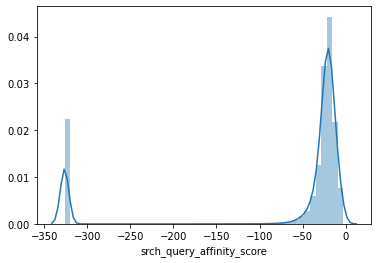

In [92]:
plt.figure()
sns.distplot(train_data['srch_query_affinity_score'])

In [33]:
def query_aff(score):
    if score < -50:
        score = -50
    score = -score
    return max(round(score / 5), 1)

train_data["query_aff"] = train_data["srch_query_affinity_score"].apply(query_aff)
test_data["query_aff"] = test_data["srch_query_affinity_score"].apply(query_aff)

train_data["query_aff"].value_counts()

4     1159820
3      865325
10     834772
5      827570
6      396042
2      304220
7      208954
1      182239
8      118172
9       61233
Name: query_aff, dtype: int64

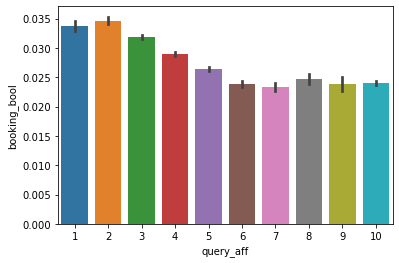

In [100]:
plt.figure()
sns.barplot(x = 'query_aff', y = 'booking_bool', data=train_data)

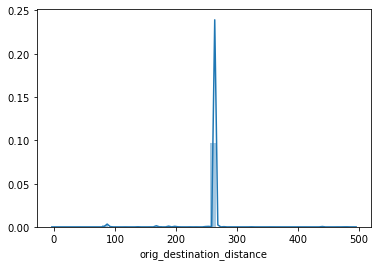

In [99]:
plt.figure()
tmp = train_data.loc[train_data['orig_destination_distance'] < 500]
sns.distplot(tmp['orig_destination_distance'])

In [34]:
def distance(orig_dist):
    if orig_dist < 200:
        return 1
    if orig_dist < 500:
        return 2
    if orig_dist < 2000:
        return 3
    return 4



train_data["distance"] = train_data["orig_destination_distance"].apply(distance)
test_data["distance"] = test_data["orig_destination_distance"].apply(distance)

train_data["distance"].value_counts()

2    4503902
1     167283
4     163486
3     123676
Name: distance, dtype: int64

In [102]:
train_data["prop_review_score"].value_counts()

4.0    1564312
4.5    1546880
3.5     768054
3.0     375905
5.0     235947
0.0     233294
2.5     143886
2.0      62301
1.5      14465
1.0      13303
Name: prop_review_score, dtype: int64

In [35]:
def month(date):
    return int(date[5:7])
def year(date):
    return int(date[0:4])

train_data["year"] = train_data["date_time"].apply(year)
test_data["year"] = test_data["date_time"].apply(year)

train_data["month"] = train_data["date_time"].apply(month)
test_data["month"] = test_data["date_time"].apply(month)

test_data["month"].value_counts()

6     740292
3     699945
5     697266
4     648924
1     616775
2     583970
11    494555
12    477456
Name: month, dtype: int64

## Output dataset

In [38]:
output_features = [
    'booking_bool',
    'site_id',
    'month',
    'year',
    #'visitor_location_country_id'
    'prop_starrating',
    'prop_brand_bool',
    'location_score1',
    'log_historical_price',
    'price_group',
    'promotion_flag',
    #'srch_destination_id',
    'length_of_stay',
    'booking_window',
    'srch_adults_count',
    'srch_children_count',
    'srch_room_count',
    'srch_saturday_night_bool',
    'random_bool',
    'foreigner',
    'preferred',
    'strong_competitor',
    'query_aff',
    'distance',
    'location_score2',
    'prop_review_score',
    'family_type'
]

output_train = train_data[output_features]
output_test = test_data[output_features[1:]]

In [39]:
output_train.to_csv("output_train.csv")
#output_train.to_csv("output_train.csv", sep = ' ', header = False, index = False)

In [40]:
output_test.to_csv("output_test.csv")
#output_test.to_csv("output_test.csv", sep = ' ', header = False, index = False)

Use probability classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

features = ['prop_starrating', 'prop_brand_bool', 'prop_location_score1', 'prop_log_historical_price', 'price_group', 'promotion_flag', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'random_bool', 'foreigner', 'preferred', 'strong_competitor', 'srch_query_affinity_score', 'orig_destination_distance', 'prop_location_score2', 'prop_review_score']
y = train_data['booking_bool']

X = train_data[features]
X_test = test_data[features]

model = RandomForestClassifier(n_estimators=30, max_depth=30)

model.fit(X, y)
predictions = model.predict_proba(X_test)

print("Finished")

Finished


In [32]:
print(predictions[0:100])

[[9.76231576e-01 2.37684240e-02]
 [9.07293749e-01 9.27062513e-02]
 [9.95451100e-01 4.54889983e-03]
 [9.86351044e-01 1.36489563e-02]
 [9.74742590e-01 2.52574098e-02]
 [8.30026257e-01 1.69973743e-01]
 [9.85231055e-01 1.47689449e-02]
 [9.98459886e-01 1.54011448e-03]
 [9.50485923e-01 4.95140769e-02]
 [9.00258234e-01 9.97417657e-02]
 [9.88231025e-01 1.17689751e-02]
 [9.99716312e-01 2.83687943e-04]
 [9.39174184e-01 6.08258159e-02]
 [9.48074555e-01 5.19254451e-02]
 [9.74080899e-01 2.59191013e-02]
 [9.87819955e-01 1.21800454e-02]
 [9.77314974e-01 2.26850261e-02]
 [9.28627981e-01 7.13720192e-02]
 [9.47369992e-01 5.26300076e-02]
 [9.32236951e-01 6.77630487e-02]
 [9.81543775e-01 1.84562252e-02]
 [9.89654262e-01 1.03457383e-02]
 [9.81252218e-01 1.87477824e-02]
 [8.79350400e-01 1.20649600e-01]
 [9.90245590e-01 9.75441006e-03]
 [8.92156863e-01 1.07843137e-01]
 [9.94998884e-01 5.00111576e-03]
 [9.62124377e-01 3.78756226e-02]
 [9.96213301e-01 3.78669930e-03]
 [9.27580444e-01 7.24195556e-02]
 [9.261331

Sort and output

In [33]:
result = pd.DataFrame({'srch_id': test_data.srch_id, 'prop_id': test_data.prop_id, 'value': predictions[:,1]})
output = result.sort_values(by=['srch_id', 'value'], ascending = (True, False))[['srch_id', 'prop_id']]
# print(output)

output.to_csv('output/my_submission.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!
